In [1]:
#======================================================================
#
#     This routine solves an infinite horizon growth model 
#     with dynamic programming and sparse grids
#
#     The model is described in Scheidegger & Bilionis (2017)
#     https://papers.ssrn.com/sol3/papers.cfm?abstract_id=2927400
#
#     external libraries needed:
#     - IPOPT (https://projects.coin-or.org/Ipopt)
#     - PYIPOPT (https://github.com/xuy/pyipopt)
#     - TASMANIAN (http://tasmanian.ornl.gov/)
#
#     Simon Scheidegger, 11/16 ; 07/17
#======================================================================

import nonlinear_solver_initial as solver     #solves opt. problems for terminal VF
import nonlinear_solver_iterate as solviter   #solves opt. problems during VFI
from parameters import *                      #parameters of model
import interpolation as interpol              #interface to sparse grid library/terminal VF
import interpolation_iter as interpol_iter    #interface to sparse grid library/iteration
import postprocessing as post                 #computes the L2 and Linfinity error of the model

import TasmanianSG                            #sparse grid library
import numpy as np


#======================================================================
# Start with Value Function Iteration

# terminal value function : "ss", no uncertainty --> ss values of c,l,k

Value = []
if (numstart==0):
    for g in range(5):
        iG = g
        print("Evaluating grid for state", iG)
        Value.append(TasmanianSG.TasmanianSparseGrid())
        Value[iG]=interpol.sparse_grid(n_agents, iDepth, iG)
        #lvalnew[iG].plotResponse2D()
        points = Value[iG].getPoints()
        #print(points)

    
# value function during iteration --> take ss values of c,l,k and 
else:
    print("Set numstart to 0 PLEEEEASE")
    

lvalold = Value
points = np.array([])
for i in range(numstart, numits):
    print("Iteration number", i) 
    Value = []
    for g in range(5):
        iG = g
        print("Evaluating grid for state", iG)
        Value.append(TasmanianSG.TasmanianSparseGrid())
        Value[iG]=interpol_iter.sparse_grid_iter(n_agents, iDepth, iG, lvalold)
        points = Value[iG].getPoints()
        
    lvalold=Value
#======================================================================
print( "===============================================================")
print( " " )
print( " Computation of a growth model of dimension ", n_agents ," finished after ", numits, " steps")
print( " " )
print( "===============================================================")
#======================================================================

# compute errors   
avg_err=post.ls_error(n_agents, numstart, numits, No_samples)

#======================================================================
print( "===============================================================")
print( " ")
print( " Errors are computed -- see errors.txt")
print( " ")
print( "===============================================================")
#======================================================================

('Evaluating grid for state', 0)
('Evaluating grid for state', 1)
('Evaluating grid for state', 2)
('Evaluating grid for state', 3)
('Evaluating grid for state', 4)
('Iteration number', 0)
('Evaluating grid for state', 0)
('Number of Points', 5)
('Number of Points', 12)
('Number of Points', 25)
('Max Number of Points', 65)
('Evaluating grid for state', 1)
('Number of Points', 5)
('Number of Points', 12)
('Number of Points', 25)
('Max Number of Points', 65)
('Evaluating grid for state', 2)
('Number of Points', 5)
('Number of Points', 12)
('Number of Points', 27)
('Max Number of Points', 65)
('Evaluating grid for state', 3)
('Number of Points', 5)
('Number of Points', 12)
('Number of Points', 25)
('Max Number of Points', 65)
('Evaluating grid for state', 4)
('Number of Points', 5)
('Number of Points', 12)
('Number of Points', 25)
('Max Number of Points', 65)
('Iteration number', 1)
('Evaluating grid for state', 0)
('Number of Points', 5)
('Number of Points', 12)
('Number of Points', 25)


ERROR: found problem with llfX
ERROR: llfX.shape[1] should equal 0 instead it equals 2


('Max Number of Points', 65)
 
(' Computation of a growth model of dimension ', 2, ' finished after ', 5, ' steps')
 


TasmanianInputError: 

[0.77943454 2.67207081]


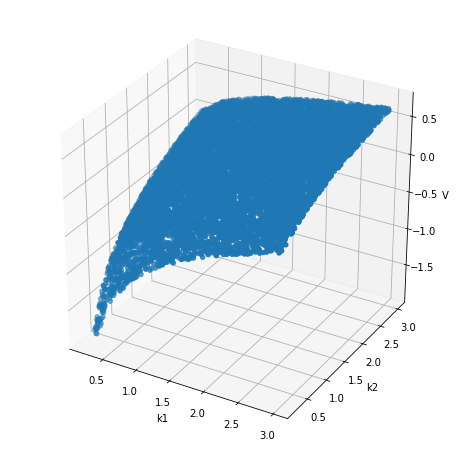

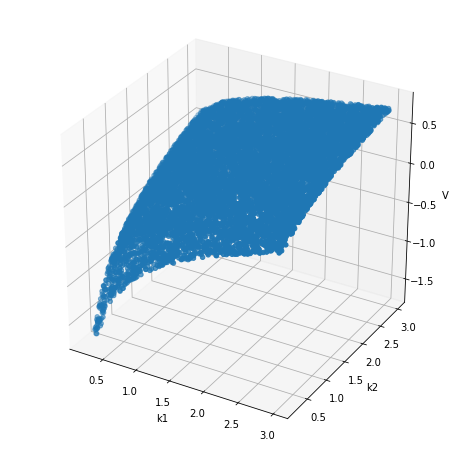

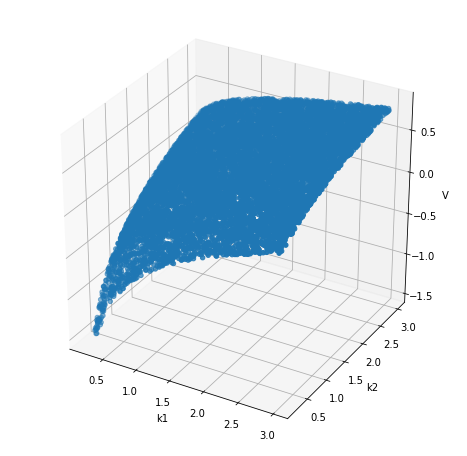

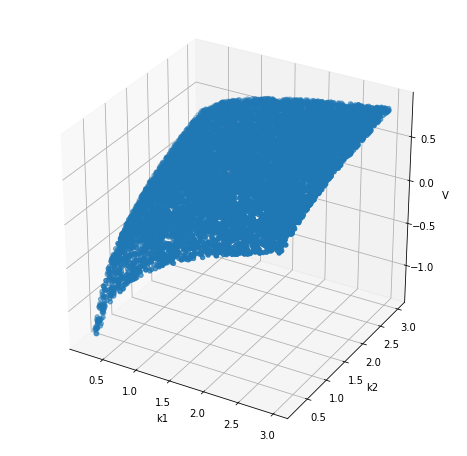

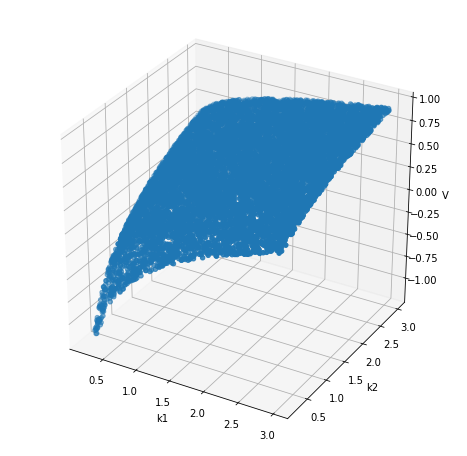

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from random import uniform
from mpl_toolkits.mplot3d import Axes3D
# Plot the 5 policy functions

aPnts = np.empty([10000, 2])  
for iI in range(aPnts.shape[0]):
    for iJ in range(2):
        aPnts[iI][iJ] = uniform(0.2, 3)

print(aPnts[1])


# kgrid = np.array(points)
# print(kgrid[1])
# k1 = np.array([kgrid[1]])
# print(k1)
# print(Value[1].evaluateBatch(k1))
 

#print(kgrid)
aRes = np.empty([aPnts.shape[0],5])
for i in range(5):
    for j in range(aPnts.shape[0]):
        kj = np.array([aPnts[j]])
        aRes[j,i] = Value[i].evaluateBatch(kj) # Evaluate the interpolant at the cartesian grid
    fig = plt.figure(figsize=(8,8))
    ax = plt.axes(projection='3d')
    ax = fig.add_subplot(1,1,1, projection='3d')
    ax.scatter3D(aPnts[:,0], aPnts[:,1], aRes[:,i])
    ax.set_xlabel('k1')
    ax.set_ylabel('k2')
    ax.set_zlabel('V')
    plt.show()


# plt.legend([r'$\theta_1$' , r'$\theta_2$', r'$\theta_3$', r'$\theta_4$', r'$\theta_5$'], loc=1)
# plt.show()